In [222]:
import f3dasm
import numpy as np

In [223]:
dim = 6

In [224]:
levy = f3dasm.functions.Levy(dimensionality=dim,scale_bounds=np.tile([-1.0,1.0], (dim,1)), seed=42)

In [225]:
# for i in range(1000):
#     seed = np.random.randint(low=0, high=2**32)
#     levy = f3dasm.functions.Ackley(dimensionality=dim,scale_bounds=np.tile([0.0,1.0], (dim,1)), seed=seed)
#     # print(levy.offset)
#     xmin = levy._check_global_minimum()
#     assert levy.check_if_within_bounds(xmin)

In [226]:
scale_bounds = levy.scale_bounds
input_domain = levy.input_domain
off = levy.offset

In [227]:
aug = f3dasm.functions.FunctionAugmentor()

In [228]:
scale = f3dasm.functions.Scale(scale_bounds=scale_bounds, input_domain=input_domain)
offset = f3dasm.functions.Offset(offset=off)

In [229]:
x = np.array([0.3]*dim)
x

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [230]:
levy.augmentor.augment_reverse_output(x)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [231]:
xx = levy.augmentor.augment_input(x)
levy.augmentor.augment_reverse_input(xx)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [232]:
x_scale = scale.augment(x)
x_scale

array([3., 3., 3., 3., 3., 3.])

In [233]:
scale.reverse_augment(x_scale)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [234]:
x_offset = offset.augment(x)
x_offset

array([1.55091976, 0.39857139, 0.83601212, 1.10268303, 1.98796272,
       1.98801096])

In [235]:
offset.reverse_augment(x_offset)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [236]:
aug.add_input_augmentor(scale)
aug.add_input_augmentor(offset)

In [237]:
x_aug = aug.augment_input(x)
x_aug

array([4.25091976, 3.09857139, 3.53601212, 3.80268303, 4.68796272,
       4.68801096])

In [238]:
aug.augment_reverse_input(x_aug)

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

In [239]:
f = f3dasm.functions.Brent(dimensionality=2, seed=3, scale_bounds=np.tile([0.0,1.0], (2,1)))
X = np.array([-10, -10]) # X = np.array([[-np.pi, 12.275], [np.pi, 2.275], [9.42478, 2.475]])
input_domain = np.array([[-20, 0], [-20, 0]])
X


array([-10, -10])

In [240]:
f.scale_bounds

array([[0., 1.],
       [0., 1.]])

In [ ]:
f.offset

array([1.56675595, 4.87110427])

In [242]:
f.get_global_minimum(2)

(array([[2.06675595, 5.37110427]]), array([[1.38389653e-87]]))

In [243]:
f.offset

array([1.56675595, 4.87110427])

In [244]:
s = f3dasm.functions.Scale(scale_bounds=np.tile([0.0,1.0], (2,1)), input_domain=input_domain)
xs = s.reverse_augment(X)
s.augment(xs)

array([-10., -10.])

In [245]:
o = f3dasm.functions.Offset(offset=f.offset)
xo = s.reverse_augment(X)
s.augment(xo)

array([-10., -10.])

In [246]:
x1 = o.reverse_augment(X)
x2 = s.reverse_augment(x1)
x2

array([0.5783378 , 0.74355521])

In [247]:
xx1 = s.augment(x2)
xx2 = o.augment(xx1)
xx2

array([-10., -10.])

In [248]:
tt = f3dasm.functions.FunctionAugmentor(input_augmentors=[s,o])
xa = tt.augment_input(X)
tt.augment_reverse_input(xa)

array([-10., -10.])

In [249]:
x_min = tt.augment_reverse_input(X)
f(x_min)

array([[9451.83956892]])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>)

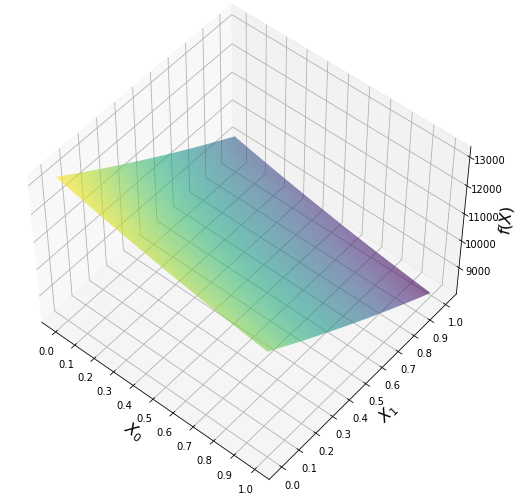

In [250]:
f.plot(px=300,domain=np.tile([0.0,1.0], (2,1)))

In [251]:
xa

array([-221.56675595, -224.87110427])

In [252]:
f._retrieve_original_input(xa)

array([[-8.51158184, -5.37245094]])

In [253]:
f.offset

array([1.56675595, 4.87110427])

In [254]:
f.augmentor.augment_reverse_input(X)

array([2.06675595, 5.37110427])

In [255]:
XX = f.augmentor.augment_input(X)
XX

array([-251.33511908, -317.4220855 ])

In [256]:
f.augmentor.augment_reverse_input(XX)

array([-10., -10.])

In [257]:
f._retrieve_original_input(XX)

array([[-10., -10.]])

In [258]:
x_min = f.get_global_minimum(d=2)
x_min

(array([[2.06675595, 5.37110427]]), array([[1.38389653e-87]]))

In [259]:
f._retrieve_original_input(x_min)

AttributeError: 'tuple' object has no attribute 'ndim'

In [ ]:
f.augmentor.augment_reverse_input(x_min)